In [16]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import random
from model import ELM

In [17]:
# set this to enforce a seed for randomness for reproducibility
np.random.seed(0)

In [18]:
# Network Settings
num_classes = 10
num_hidden_layers = 512
input_length = 28**2

In [19]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Process images into input vectors
# each mnist image is a 28x28 picture with value ranges between 0 and 255
x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, input_length)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, input_length)

# converts [1,2] into [[0,1,0], [0,0,1]]
y_train = to_categorical(y_train, num_classes).astype(np.float32)
y_test = to_categorical(y_test, num_classes).astype(np.float32)

In [20]:
x_train.shape

(60000, 784)

In [21]:
y_train.shape

(60000, 10)

In [22]:
x_test.shape

(10000, 784)

In [23]:
y_test.shape

(10000, 10)

In [24]:
# create instance of our model
model = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (784, 512)
Beta shape: (512, 10)


In [25]:
# Train
model.fit(x_train, y_train, display_time=True)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

Training time (seconds): 1.584298849105835
train loss: 0.014635
train acc: 0.908933


In [26]:
# Validation
val_loss, val_acc = model.evaluate(x_test, y_test)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.014420
val acc: 0.910300


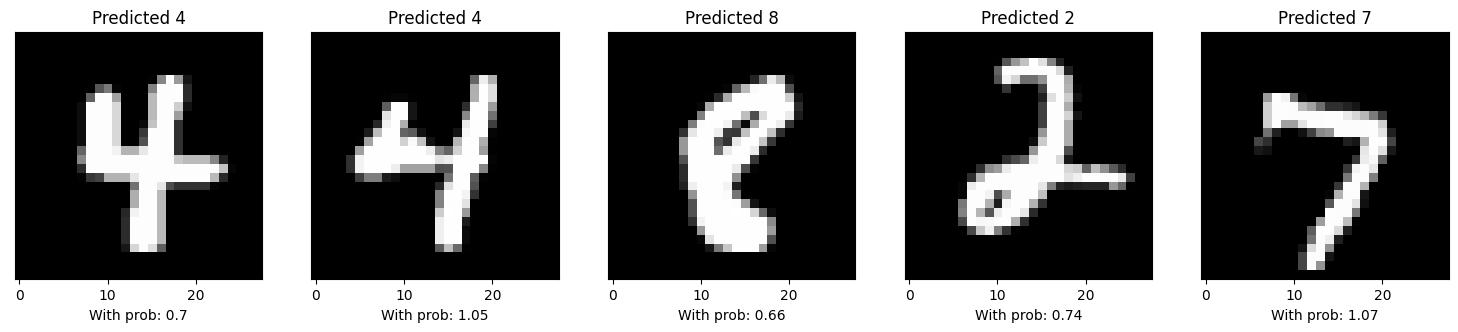

In [27]:
# Predictions
test_data = x_test[np.random.choice(len(x_test), size=5, replace=False)]
predictions = model(test_data)

fig, axs = plt.subplots(1, 5)
fig.set_size_inches(18.5, 10.5)
for idx, image in enumerate(test_data):
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    axs[idx].imshow(pixels, cmap='gray')
    axs[idx].axes.get_yaxis().set_visible(False)
    axs[idx].title.set_text(f'Predicted {np.argmax(predictions[idx])}')
    axs[idx].set_xlabel(f'With prob: {str(round(np.max(predictions[idx]), 2))}')
    
    
plt.show()

In [28]:
predictions = model(x_test)
correct_count = 0
for idx, val in enumerate(x_test):
    print(y_test[idx])
    print(f'Actual {np.argmax(y_test[idx])}')
    print(f'Predicted {np.argmax(predictions[idx])}')
    print(f'With prob: {str(round(np.max(predictions[idx]), 2))}')
    if (np.argmax(y_test[idx]) == np.argmax(predictions[idx])):
        correct_count = correct_count + 1
    print("------------------")

print(f'Total testing accuracy: {round(correct_count / len(x_test), 2)}')

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Actual 7
Predicted 7
With prob: 1.08
------------------
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual 2
Predicted 2
With prob: 0.73
------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 1
Predicted 1
With prob: 0.94
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.71
------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual 4
Predicted 4
With prob: 0.74
------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 1
Predicted 1
With prob: 0.94
------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual 4
Predicted 4
With prob: 0.57
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 9
With prob: 0.51
------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual 5
Predicted 5
With prob: 0.58
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 9
With prob: 0.58
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.94
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual 4
Predicted 4
With prob: 0.77
------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual 5
Predicted 5
With prob: 0.73
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.62
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.73
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 0.69
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.79
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 9
With prob: 0.65
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.84
------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual 5
Predicted 5
With prob: 0.62
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 5
With prob: 0.52
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 9
With prob: 0.63
------------------
[1. 0. 0. 0. 

------------------
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual 2
Predicted 2
With prob: 0.55
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.57
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 0.91
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.79
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.77
------------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Actual 3
Predicted 3
With prob: 0.51
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 1.09
------------------
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual 2
Predicted 1
With prob: 0.53
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 4
With prob: 0.35
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.56
------------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Actual 3
Predicted 3
With prob: 0.66
------------------
[0. 0. 1. 0. 

------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 0.9
------------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Actual 7
Predicted 7
With prob: 1.1
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.73
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Actual 9
Predicted 9
With prob: 0.83
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.84
------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 1
Predicted 1
With prob: 0.69
------------------
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual 2
Predicted 2
With prob: 0.95
------------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Actual 3
Predicted 3
With prob: 0.96
------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual 4
Predicted 4
With prob: 0.91
------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual 5
Predicted 5
With prob: 0.83
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 1.15
------------------
[0. 0. 0. 0. 0.

Actual 0
Predicted 0
With prob: 0.7
------------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 1
Predicted 1
With prob: 0.93
------------------
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual 2
Predicted 2
With prob: 0.7
------------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Actual 3
Predicted 8
With prob: 0.6
------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Actual 4
Predicted 4
With prob: 0.66
------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Actual 5
Predicted 5
With prob: 0.82
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 0.54
------------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Actual 7
Predicted 7
With prob: 0.8
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.53
------------------
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Actual 8
Predicted 8
With prob: 0.83
------------------
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual 0
Predicted 0
With prob: 0.88
------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Actual 6
Predicted 6
With prob: 0.45